# Visualizing and performing the machine learning

### Import tools:

In [1]:
import data_training as dt;
import plotting;
import matplotlib.pyplot as plt
import itertools
import numpy as np

Welcome to JupyROOT 6.30/04


### Get the data sets:

In [2]:
no_set=10 # 100
directory_sets=f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/"
directory_hists=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/"
save_dir_plots = f'/home/katrin/Cern_summerProject/imgs/set_{no_set}/'
save_dir_mlplots=f"/home/katrin/Cern_summerProject/ml_plots/set_{no_set}/"


file_directory_data="/home/katrin/Cern_summerProject/data/AO2D_data_woK0.root"#"/home/katrin/Cern_summerProject/data/AnalysisResults_treesML_data.root" 
tree_data="O2lambdatableml"
file_directory_mc="/home/katrin/Cern_summerProject/data/AO2D_MC_240722.root"#"/home/katrin/Cern_summerProject/data/AO2D_MC.root"
tree_mc="O2mclambdatableml"


allsets=plotting.get_sets(already_saved=True, onlynewMC=False,onlynewDataBckg=False, directory_sets=directory_sets, file_directory_data=file_directory_data, file_directory_mc=file_directory_mc, tree_data=tree_data, tree_mc=tree_mc)
sets=list(allsets.values())
set_names=list(allsets.keys())
files={}
for nm in set_names:
    files[nm]=directory_sets+nm+".root"
print(files)

vars=[st.get_var_names() for st in sets]
vars_shared=[var for var in vars[0] if all(var in sublist for sublist in vars)]

Subsets already saved
{'bckg_MC_woSignal': '/home/katrin/Cern_summerProject/root_trees/set_10/bckg_MC_woSignal.root', 'prompt': '/home/katrin/Cern_summerProject/root_trees/set_10/prompt.root', 'bckg_data': '/home/katrin/Cern_summerProject/root_trees/set_10/bckg_data.root', 'bckg_MC': '/home/katrin/Cern_summerProject/root_trees/set_10/bckg_MC.root', 'rightsideband_MC': '/home/katrin/Cern_summerProject/root_trees/set_10/rightsideband_MC.root', 'bckg_MC_Qtcut': '/home/katrin/Cern_summerProject/root_trees/set_10/bckg_MC_Qtcut.root', 'nonprompt': '/home/katrin/Cern_summerProject/root_trees/set_10/nonprompt.root', 'prompt_Qtcut': '/home/katrin/Cern_summerProject/root_trees/set_10/prompt_Qtcut.root', 'nonprompt_Qtcut': '/home/katrin/Cern_summerProject/root_trees/set_10/nonprompt_Qtcut.root'}


## Creating new Subset

In [3]:

#data=plotting.get_TreeHandler(file_name=file_directory_data,tree_name=tree_data,folder_name="DF*")
#leftsideband=plotting.apply_cuts(data=data, var="fMass", upper_cut=1.1)
#rightsideband=plotting.apply_cuts(data=data, var="fMass", lower_cut=1.13)
#plotting.save_sets(sets=[leftsideband,rightsideband], set_names=["leftsideband","rightsideband"],dir_tree=directory_sets)
    

#### Rightsideband MC

In [4]:

#rightsideband_MC=plotting.apply_cuts(data=allsets["bckg_MC_woSignal"], var="fMass", lower_cut=1.13)
#plotting.save_sets(sets=[rightsideband_MC], set_names=["rightsideband_MC"],dir_tree=directory_sets)
    

#### Cutting signal from MC bakcground:

In [5]:
#bckg_MC_woSignal=plotting.apply_cuts(data=allsets["bckg_MC"],var="fPDGMatchMotherSecondMother",lower_cut=-999,upper_cut=-999)
#plotting.save_sets(sets=[bckg_MC_woSignal], set_names=["bckg_MC_woSignal"],dir_tree=directory_sets)


#### Qt cutted MC background, prompt, nonprompt

In [6]:
#bckg_MC_Qtcut=plotting.apply_cuts(data=allsets["bckg_MC_woSignal"],var="fQtAP",upper_cut=0.12,lower_cut=0.01)
#prompt_Qtcut=plotting.apply_cuts(data=allsets["prompt"],var="fQtAP",upper_cut=0.12,lower_cut=0.01)
#nonprompt_Qtcut=plotting.apply_cuts(data=allsets["nonprompt"],var="fQtAP",upper_cut=0.12,lower_cut=0.01)
#plotting.save_sets(sets=[bckg_MC_Qtcut,prompt_Qtcut,nonprompt_Qtcut], set_names=["bckg_MC_Qtcut","prompt_Qtcut","nonprompt_Qtcut"],dir_tree=directory_sets)


#### Mass cutted MC

In [7]:
#BckgMC_cuttedMass=plotting.apply_cuts(data=allsets["bckg_MC"], var="fMass", upper_cut=1.13, lower_cut=1.1, inclusive=False)
#plotting.save_sets(sets=[BckgMC_cuttedMass], set_names=["BckgMC_cuttedMass"],dir_tree=directory_sets)


## Plotting 1D Distributions:

#### Mass distribution Monte Carlo

In [8]:
#plotting.plot_some_dist(sets=[allsets["bckg_MC"],bckg_MC_woSignal], to_plot=["fMass"], labels=["Monte Carlo background", "Monte Carlo background w/ signal"], fs=(8,5),fontsize=15,save_fig=True,pdf_filename=save_dir_plots+"Mass_distribution_MC.pdf")

## Plotting 2D Histograms:

#### Armenteros Plots:

In [9]:
#plotting.plot_2dhist_root(file_names=[files["bckg_MC"],files["bckg_MC_woSignal"]],set_names=["bckg_MC","bckg_MC_woSignal"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100,cmap="twilight", save_directory=directory_hists, save_pdf=True, save_file=False,logz=True)

In [10]:
#plotting.plot_2dhist_root(file_names=[file_directory_mc],set_names=["MonteCarlo_leftSideband"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass<1.1")
#plotting.plot_2dhist_root(file_names=[file_directory_mc],set_names=["MonteCarlo_rightSideband"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass>1.13")
#plotting.plot_2dhist_root(file_names=[file_directory_mc],set_names=["MonteCarlo_SignalRegion"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass<1.3 && fMass>1.1")
#

In [11]:
#plotting.plot_2dhist_root(file_names=[files["bckg_MC_woSignal"]],set_names=["MonteCarlo_Bckg_leftSideband"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass<1.1")
#plotting.plot_2dhist_root(file_names=[files["bckg_MC_woSignal"]],set_names=["MonteCarlo_Bckg_rightSideband"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass>1.13")
#plotting.plot_2dhist_root(file_names=[files["bckg_MC_woSignal"]],set_names=["MonteCarlo_Bckg_SignalRegion"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass<1.13 && fMass>1.1")

In [12]:
#plotting.plot_2dhist_root(file_names=[files["rightsideband_MC"]],set_names=["rightsideband_MC"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=True, save_file=False,cuts="fQtAP!=-999",pdf_name="Armenteros_rightsideBandMC.pdf")


#### 3D Armenteros

In [13]:
#plotting.plot_3dhist_root(file_names=[files["bckg_MC_woSignal"]],set_names=["bckg_MC_woSignal"], varsx=["fAlphaAP"], varsy=["fQtAP"],varsz=["fPDGCodeMotherDauNeg"], binsx=100, binsy=100, binsz=200, save_directory=directory_hists, save_pdf=False, save_file=True,cuts="fQtAP!=-999 && fMass>1.13")
#plotting.plot_3dhist_root(file_names=[files["bckg_MC_woSignal"]],set_names=["bckg_MC_woSignal"], varsx=["fAlphaAP"], varsy=["fQtAP"],varsz=["fPDGCodeMotherDauNeg"], binsx=100, binsy=100, binsz=100, save_directory=directory_hists, save_pdf=False, save_file=False,cuts="fQtAP!=-999 && fMass>1.13 && fPDGCodeMotherDauNeg==3212")


#### Armenteros per PDGCodeMotherDauNeg

In [14]:
#pdgs_neg=[310,-3122,3312]#plotting.get_allPDG(data=allsets["bckg_MC_woSignal"],variable="fPDGCodeMotherDauNeg")
#pdgs_pos=plotting.get_allPDG(data=allsets["bckg_MC_woSignal"],variable="fPDGCodeMotherDauPos")
#pdfs=[]
#for pdgneg, pdgpos in list(itertools.product(pdgs_neg, pdgs_pos)):
#    plotting.plot_2dhist_root(file_names=[files["rightsideband_MC"]],set_names=["rightsideband_MC"], varsx=["fAlphaAP"], varsy=["fQtAP"], binsx=100, binsy=100, save_directory=directory_hists, save_pdf=True, save_file=False,cuts=f"fQtAP!=-999 && fPDGCodeMotherDauNeg=={pdgneg} && fPDGCodeMotherDauPos=={pdgpos}",pdf_name=f"pdg_{pdgneg}_{pdgpos}.pdf")
#    pdfs.append(directory_hists+f"pdg_{pdgneg}_{pdgpos}.pdf")
#plotting.merge_pdfs(pdfs,output_path=directory_hists+"Armenteros_rightsideBandMC_perPDGPosNeg.pdf")

In [15]:
#plotting.plot_2dhist_root(file_names=[files["prompt"]],set_names=["prompt"],varsx=["fMass","fPt"],varsy=["fCosPA","fPt"], binsx=100, cmap="twilight",save_directory=directory_hists, save_pdf=False, save_file=False)

## Plotting 3D Histograms:

In [16]:
#plotting.plot_3dhist_root(file_names=[files["prompt"]],set_names=["prompt"],varsx=["fMass", "fDcaV0PV"],varsy=["fCosPA"], varsz=["fPt"],save_directory=directory_hists,save_file=False, save_pdf=True)


## Plotting the Crystallball fits:

In [17]:
#plotting.plot_chrystalball_fit(file_directory_data=file_directory_data)
#plotting.crystalball_fit_seperatedbins(file_directory_data=file_directory_data, hist2d_saved=False, save_pdf=False, cheb=True, with_cut=True)

## Plotting BDT Scans

In [18]:
#for i in np.arange(0,0.2,step=0.02):
#    maxkey, maxval= plotting.plot_scans_bdt(prompt=allsets["prompt"],nonprompt=allsets["nonprompt"], range=[i,1], no_points=100,var="trainBckgMC_class2")
#    print(i,maxkey,maxval)

#### Features in nonprompt rich sample:

In [19]:
#vars=[st.get_var_names() for st in sets]
#
#vars_shared=[var for var in vars[0] if all(var in sublist for sublist in vars)]
#prompt_nonpromptregion=plotting.apply_cuts(data=allsets["prompt"], var="trainBckgMC_class2",upper_cut=0.13519999999999993, lower_cut=0.06)
#nonprompt_nonpromptregion=plotting.apply_cuts(data=allsets["nonprompt"], var="trainBckgMC_class2",upper_cut=0.13519999999999993, lower_cut=0.06)
##bckg_nonpromptregion=plotting.apply_cuts(data=allsets["bckg_MC_woSignal"], var="trainBckgMC_class2",upper_cut=0.13519999999999993, lower_cut=0.06)
#
#
#
#plotting.plot_some_dist(sets=[allsets["prompt"], prompt_nonpromptregion], to_plot=vars_shared+["trainBckgMC_class2"], labels=["prompt", "prompt in nonprompt region"],save_fig=True, pdf_filename=save_dir_plots+"prompt_nonpromptRegion.pdf",fontsize=12)
##plotting.plot_some_dist(sets=[allsets["bckg_MC_woSignal"], bckg_nonpromptregion], to_plot=vars_shared+["trainBckgMC_class2"], labels=["bckg", "bckg in nonprompt region"])
#plotting.plot_some_dist(sets=[allsets["nonprompt"], nonprompt_nonpromptregion], to_plot=vars_shared+["trainBckgMC_class2"], labels=["nonprompt", "nonprompt in nonprompt region"],save_fig=True, pdf_filename=save_dir_plots+"nonprompt_nonpromptRegion.pdf",fontsize=12)


In [20]:
#model_bckgMC=dt.get_model(file_name=save_dir_mlplots+"model_bckgMC.pickle")
#data_withPred=dt.model_prediction_data(model=model_bckgMC, directory_data=file_directory_data, marg=False,applyModelHandler=True,name_training="trainBckgMC")
#datawithPred_cutted=plotting.apply_cuts(data=data_withPred,var="trainBckgMC_class2",upper_cut=0.13519999999999993, lower_cut=0.06)
#plotting.plot_some_dist(sets=[datawithPred_cutted, data_withPred],labels=["data in nonprompt region", "data"],to_plot=vars_shared+["trainBckgMC_class2"],save_fig=True)




In [21]:
#model_bckgMC=dt.get_model(file_name=save_dir_mlplots+"model_bckgMC.pickle")
#mc_withPred=plotting.apply_cuts(data=dt.model_prediction_data(model=model_bckgMC,directory_data=file_directory_mc, tree_data=tree_mc,marg=False, applyModelHandler=True, name_training="trainBckgMC"), var="fMass", lower_cut=-999, upper_cut=-999, inclusive=False)
#mc_withPred_cutted=plotting.apply_cuts(data=mc_withPred,var="trainBckgMC_class2",upper_cut=0.13519999999999993, lower_cut=0.06)
#plotting.plot_some_dist(sets=[mc_withPred_cutted, mc_withPred],labels=["MC in nonprompt region", "MC"],to_plot=vars_shared+["trainBckgMC_class2"],save_fig=True)




## Plotting the machine learning results:

#### Training with MC Background:

In [22]:
#traindata,model=dt.trainmodel([allsets["bckg_MC_woSignal"],allsets["nonprompt"],allsets["prompt"]],set_names=["bckg_MC_woSignal","nonprompt", "prompt"], name_training="trainBckgMC",directory_sets=directory_sets,multi=True)
#dt.save_model(model=model, file_name=save_dir_mlplots+"model_bckgMC.pickle")


#### Training with fQtAP cut:

In [23]:
#traindata,model=dt.trainmodel([allsets["bckg_MC_Qtcut"],allsets["nonprompt_Qtcut"],allsets["prompt_Qtcut"]],set_names=["bckg_MC_Qtcut","nonprompt_Qtcut", "prompt_Qtcut"], name_training="train_Qtcut",directory_sets=directory_sets,multi=True)
#dt.save_model(model=model, file_name=save_dir_mlplots+"model_Qtcut.pickle")

#### Training with data background:

In [24]:
#traindata,model=dt.trainmodel([allsets["bckg_data"],allsets["nonprompt"],allsets["prompt"]],set_names=["bckg_data","nonprompt", "prompt"], name_training="trainBckgData",directory_sets=directory_sets,multi=True)
#dt.save_model(model=model, file_name=save_dir_mlplots+"model_bckgData.pickle")


#### BDT distribution for different binnings:

In [25]:
#pdfs=[]
#dt.trainmodel([allsets["BckgMC_cuttedMass"],allsets["nonprompt"],allsets["prompt"]],set_names=["bckg_MC","nonprompt", "prompt"], name_training="trainBckgMC",directory_sets=directory_sets,multi=True)
#for i in range(1,13):
#    plotting.plot_some_dist(sets=[allsets["prompt"]], to_plot=["trainBckgMC_class2"], labels=["prompt"],logy=False,no_bins=10*i,save_fig=True, pdf_filename=f"/home/katrin/Cern_summerProject/imgs/set_{no_set}/output_{i}.pdf")
#    pdfs.append(f"/home/katrin/Cern_summerProject/imgs/set_{no_set}/output_{i}.pdf")
#plotting.merge_pdfs(pdf_list=pdfs, output_path=f"/home/katrin/Cern_summerProject/imgs/set_{no_set}/bdtOutput_binning.pdf")

#### Apply MC background trained model to data:

Mass Histogram successfully retrieved and is of type TH1F.
bdt Histogram successfully retrieved and is of type TH1F.
28667588.0
28667588.0
rdhBbdtentries: 28667588.0
rdhMass entries: 28667588.0
0
Result:
Parameter: frac_p Value: 0.8294862538286996 Error: 0.00011535056072337069
Parameter: norm_class0 Value: 1129808.9020690816 Error: 1066.9363191974116
Parameter: norm_signal Value: 27538130.929069653 Error: 3787.1613958999515
Parameter: p0 Value: -0.15202747252412402 Error: 0.0014973370523114066
Parameter: p1 Value: -4.955772597847741e-11 Error: 6.595608607184913e-06


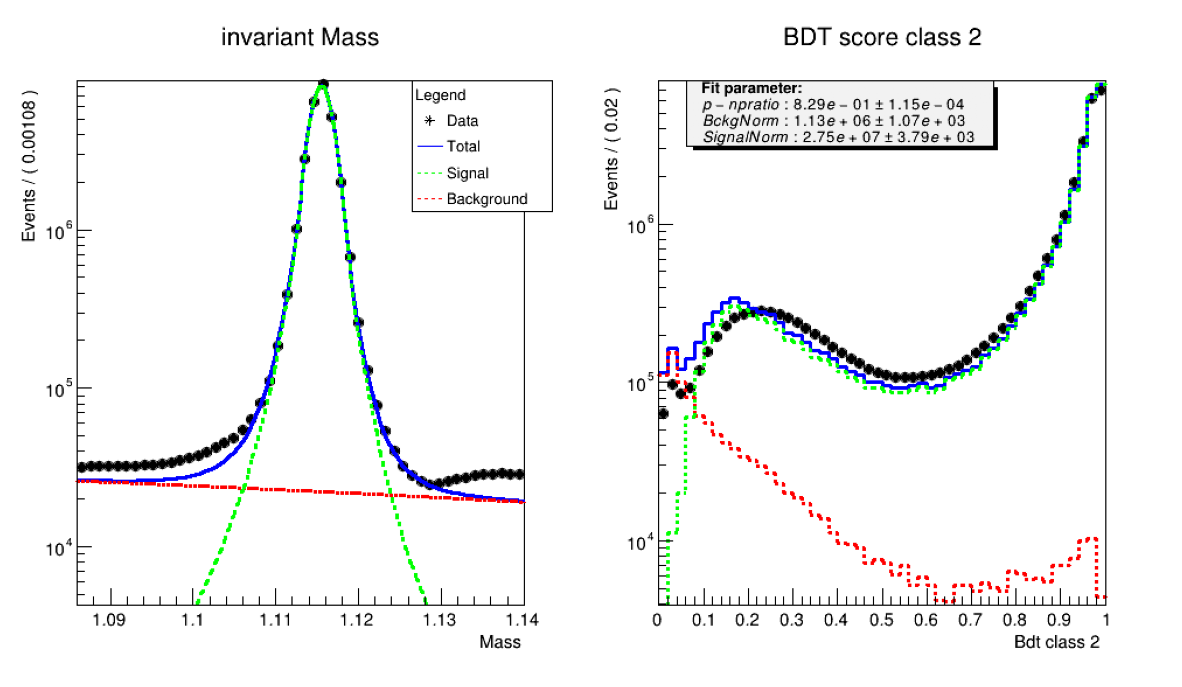

In [26]:
#model_bckgMC=dt.get_model(file_name=save_dir_mlplots+"model_bckgMC.pickle")
##pred=dt.model_prediction_data(model=model_bckgMC, directory_data=file_directory_data, marg=False)
##pred_class1=[]
##pred_class2=[]
##pred_class0=[]
##for i in range(len(pred)):
##    ls=pred[i]
##    pred_class0.append(ls[0])
##    pred_class1.append(ls[1])
##    pred_class2.append(ls[2])
#    
#
#for i in [50]:
#    #plotting.plot_hist_root(data=[pred_class2,pred_class1,pred_class0],data_names=3*["data"], save_directory=directory_hists,varsx=["bdt_class2","bdt_class1","bdt_class0"],save_pdf=False, binsx=i, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/bdt_data_{i}bins.root",from_file=False)
    #file_name_MC=f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/"
    #file_names=[file_name_MC+"prompt.root", file_name_MC+"nonprompt.root",file_name_MC+"bckg_MC_woSignal.root"]
    #plotting.plot_hist_root(save_directory=directory_hists, data_names=["prompt","nonprompt","bckg"], varsx=3*["trainBckgMC_class2"], files=[f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/prompt.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/nonprompt.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/bckg_MC_woSignal.root"], from_file=True, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/predictions_{i}bins.root",binsx=i)
#    #plotting.plot_some_dist(sets=[allsets["prompt"],allsets["nonprompt"],allsets["bckg_MC_woSignal"]],to_plot=["trainBckgMC_class2"],labels=["prompt","nonprompt","bckg MC"],fs=(10,8),no_bins=i)
#    plotting.plot_histogram_fit(file_data=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/bdt_data_{i}bins.root",hist_data="data_bdt_class2",file_model=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/predictions_{i}bins.root",hists_model=["bckg_trainBckgMC_class2","nonprompt_trainBckgMC_class2","prompt_trainBckgMC_class2"], fs=(15,10),title="MC distribution fitted to data", save_file=f"/home/katrin/Cern_summerProject/ml_distribution_fits/dist_fit_{i}bins.root",savepng=True,png_name=f"/home/katrin/Cern_summerProject/ml_distribution_fits/fit_trainBckgMC_{i}bins.png")

plotting.plot_simFit(file_hist_data=f"hists_simFit.root",hist_mass="histmass",hist_bdt="histbdt", file_model=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/predictions_50bins.root",hists_model=["bckg_trainBckgMC_class2","nonprompt_trainBckgMC_class2","prompt_trainBckgMC_class2"], fs=(15,10))


#### Apply background and Qt cutted trained model to data:

In [27]:
#model_Qtcut=dt.get_model(file_name=save_dir_mlplots+"model_Qtcut.pickle")
#pred=dt.model_prediction_data(model=model_Qtcut, directory_data=file_directory_data, marg=False)
#pred_class1=[]
#pred_class2=[]
#pred_class0=[]
#for i in range(len(pred)):
#    ls=pred[i]
#    pred_class0.append(ls[0])
#    pred_class1.append(ls[1])
#    pred_class2.append(ls[2])
    

#for i in [50]:
    #plotting.plot_hist_root(data=[pred_class2,pred_class1,pred_class0],data_names=3*["data"], save_directory=directory_hists,varsx=["bdt_class2","bdt_class1","bdt_class0"],save_pdf=False, binsx=i, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/bdt_data_Qtcut.root",from_file=False)
    #file_name_MC=f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/"
    #file_names=[file_name_MC+"prompt_Qtcut.root", file_name_MC+"nonprompt_Qtcut.root",file_name_MC+"bckg_MC_Qtcut.root"]
    #plotting.plot_hist_root(save_directory=directory_hists, data_names=["prompt","nonprompt","bckg"], varsx=3*["train_Qtcut_class2"], files=[f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/prompt_Qtcut.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/nonprompt_Qtcut.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/bckg_MC_Qtcut.root"], from_file=True, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/predictions_Qtcut.root",binsx=i)
    #plotting.plot_histogram_fit(file_data=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/bdt_data_Qtcut.root",hist_data="data_bdt_class2",file_model=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/predictions_Qtcut.root",hists_model=["bckg_train_Qtcut_class2","nonprompt_train_Qtcut_class2","prompt_train_Qtcut_class2"], fs=(15,10),title="MC distribution fitted to data", save_file=f"/home/katrin/Cern_summerProject/ml_distribution_fits/dist_fit_Qtcut.root",savepng=True,png_name=f"/home/katrin/Cern_summerProject/ml_distribution_fits/fit_Qtcut.png")

#### Apply data background trained model to data:

In [28]:
#model_bckgData=dt.get_model(file_name=save_dir_mlplots+"model_bckgData.pickle")
#pred=dt.model_prediction_data(model=model_bckgData, directory_data=file_directory_data, marg=False)
#pred_class1=[]
#pred_class2=[]
#pred_class0=[]
#for i in range(len(pred)):
#    ls=pred[i]
#    pred_class0.append(ls[0])
#    pred_class1.append(ls[1])
#    pred_class2.append(ls[2])
#
#for i in [100]:
#     plotting.plot_hist_root(data=[pred_class2,pred_class1,pred_class0],data_names=3*["data"], save_directory=directory_hists,varsx=["bdt_class2","bdt_class1","bdt_class0"],save_pdf=False, binsx=i, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/bdt_data_twData_{i}bins.root",from_file=False)
#     file_name_MC=f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/"
#     file_names=[file_name_MC+"prompt.root", file_name_MC+"nonprompt.root",file_name_MC+"bckg_data.root"]
#     plotting.plot_hist_root(save_directory=directory_hists, data_names=["prompt","nonprompt","bckg"], varsx=3*["trainBckgData_class2"], files=[f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/prompt.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/nonprompt.root",f"/home/katrin/Cern_summerProject/root_trees/set_{no_set}/bckg_data.root"], from_file=True, save_name_file=f"/home/katrin/Cern_summerProject/root_histograms/set_10/predictions_twData_{i}bins.root",binsx=i)
#     plotting.plot_some_dist(sets=[allsets["prompt"],allsets["nonprompt"],allsets["bckg_data"]],to_plot=["trainBckgData_class2"],labels=["prompt","nonprompt","bckg data"],fs=(10,8),no_bins=i)
#     plotting.plot_histogram_fit(file_data=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/bdt_data_twData_{i}bins.root",hist_data="data_bdt_class2",file_model=f"/home/katrin/Cern_summerProject/root_histograms/set_{no_set}/predictions_twData_{i}bins.root",hists_model=["bckg_trainBckgData_class2","nonprompt_trainBckgData_class2","prompt_trainBckgData_class2"], fs=(15,10),title="MC distribution fitted to data", save_file=f"/home/katrin/Cern_summerProject/ml_distribution_fits/distfit_twData_{i}bins.root",savepng=True,png_name=f"/home/katrin/Cern_summerProject/ml_distribution_fits/fit_trainBckgData_{i}bins.png")